In [1]:
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
def import_facebook_data(filename):
    file = open(filename,"r")
    sdata = file.read().splitlines()
    data = [list(map(int,i.split())) for i in sdata]
    d = {}
    ndata = list()
    for i in data:
        if tuple(i) not in d and tuple(list(reversed(i))) not in d:
            d[tuple(i)] = 0
            ndata.append(i)
    return np.unique(np.array(ndata),axis=0)

In [3]:
data = import_facebook_data("facebook_combined.txt")

In [37]:
num_vert = data.shape[0]
ndata = np.unique(data.flatten())
vert_mp = {}
rev_mp = {}
k = 0
for i in ndata:
    vert_mp[i] = k
    rev_mp[k] = i
    k += 1
adj_mat = np.zeros((ndata.shape[0],ndata.shape[0]),dtype=int)
for i in data:
    adj_mat[vert_mp[i[0]]][vert_mp[i[1]]] = 1
    adj_mat[vert_mp[i[1]]][vert_mp[i[0]]] = 1
deg = np.diag(adj_mat.sum(axis=0))
L = deg-adj_mat
deg_half = 1.0/np.sqrt(adj_mat.sum(axis=0))
deg_half[np.isinf(deg_half)] = 0
deg_h = np.diag(deg_half)
norm_L = deg_h@(L@deg_h)
eig_val,eig_vec = np.linalg.eigh(norm_L)

In [40]:
eig_val.max()

1.6061852200923605

In [4]:
def spectralDecomp_OneIter(data):
    ndata = np.unique(data.flatten())
    num_vert = ndata.shape[0]
    vert_mp = {}
    rev_mp = {}
    k = 0
    for i in ndata:
        vert_mp[i] = k
        rev_mp[k] = i
        k += 1
    adj_mat = np.zeros((ndata.shape[0],ndata.shape[0]),dtype=int)
    for i in data:
        adj_mat[vert_mp[i[0]],vert_mp[i[1]]] = 1
        adj_mat[vert_mp[i[1]],vert_mp[i[0]]] = 1
    
    deg = np.diag(adj_mat.sum(axis=0))
    L = deg-adj_mat
    
    deg_half = 1.0/np.sqrt(adj_mat.sum(axis=0))
    deg_half[np.isinf(deg_half)] = 0
    deg_h = np.diag(deg_half)
    norm_L = deg_h@(L@deg_h)
    
    eig_val,eig_vec = np.linalg.eigh(norm_L)
    d = {}
    for i,j in zip(eig_val,eig_vec.T):
        d[i] = j.T
    d = dict(sorted(d.items()))
    fiedler_vec = np.zeros((num_vert+1,1))
    for i in d:
        if i>1e-5:
            fiedler_vec = d[i]
            break
    lst = sorted(list(enumerate(fiedler_vec)),key=lambda x: x[1])
    el = list(zip(*lst))
    part = np.where(np.array(el[1])>=0)[0].shape[0]
    
    com = 0
    if part>num_vert//2:
        com = 1
    graph_partition = np.zeros((num_vert+1,2),dtype=int)
    
    for i in lst:
        if i[1]>0:
            graph_partition[i[0]][0] = rev_mp[i[0]]
            graph_partition[i[0]][1] = com
        else:
            graph_partition[i[0]][0] = rev_mp[i[0]]
            graph_partition[i[0]][1] = com^1
    
    '''for i,j in enumerate(fiedler_vec):
        if j>0:
            graph_partition[i][0] = i
            graph_partition[i][1] = com^1
        else:
            graph_partition[i][0] = i
            graph_partition[i][1] = com'''
    return fiedler_vec,adj_mat,graph_partition

In [271]:
def spectralDecomp_OneIter(data):
    ndata = np.unique(data.flatten())
    num_vert = ndata.shape[0]
    vert_mp = {}
    rev_mp = {}
    k = 0
    for i in ndata:
        vert_mp[i] = k
        rev_mp[k] = i
        k += 1
    adj_mat = np.zeros((ndata.shape[0],ndata.shape[0]),dtype=int)
    for i in data:
        adj_mat[vert_mp[i[0]],vert_mp[i[1]]] = 1
        adj_mat[vert_mp[i[1]],vert_mp[i[0]]] = 1
    
    deg = np.diag(adj_mat.sum(axis=0))
    print(deg[deg==0].shape)
    L = deg-adj_mat
    
    deg_half = 1.0/np.sqrt(adj_mat.sum(axis=0))
    deg_half[np.isinf(deg_half)] = 0
    deg_h = np.diag(deg_half)
    norm_L = deg_h@(L@deg_h)
    
    eig_val,eig_vec = np.linalg.eigh(norm_L)
    d = {}
    for i,j in zip(eig_val,eig_vec.T):
        d[i] = j.T
    d = dict(sorted(d.items()))
    print(sorted(eig_val)[:20])
    fiedler_vec = np.zeros((num_vert+1,1))
    for i in d:
        if i>1e-5:
            fiedler_vec = d[i]
            break
    lst = sorted(list(enumerate(fiedler_vec)),key=lambda x: x[1])
    el = list(zip(*lst))
    part = np.where(np.array(el[1])>=0)[0].shape[0]
    
    com = 0
    if part>num_vert//2:
        com = 1
    graph_partition = np.zeros((num_vert+1,2),dtype=int)
    
    for i in lst:
        if i[1]>0:
            graph_partition[i[0]][0] = rev_mp[i[0]]
            graph_partition[i[0]][1] = com
        else:
            graph_partition[i[0]][0] = rev_mp[i[0]]
            graph_partition[i[0]][1] = com^1
    
    '''for i,j in enumerate(fiedler_vec):
        if j>0:
            graph_partition[i][0] = i
            graph_partition[i][1] = com^1
        else:
            graph_partition[i][0] = i
            graph_partition[i][1] = com'''
    return fiedler_vec,adj_mat,graph_partition

In [259]:
def spectralDecomp_OneIter(data):
    ndata = np.unique(data.flatten())
    num_vert = ndata.shape[0]
    print(num_vert)
    vert_mp = {}
    rev_mp = {}
    k = 0
    for i in ndata:
        vert_mp[i] = k
        rev_mp[k] = i
        k += 1
    adj_mat = np.zeros((ndata.shape[0],ndata.shape[0]),dtype=int)
    for i in data:
        adj_mat[vert_mp[i[0]],vert_mp[i[1]]] = 1
        adj_mat[vert_mp[i[1]],vert_mp[i[0]]] = 1
    
    deg = np.diag(adj_mat.sum(axis=0))
    L = deg-adj_mat
    
    deg_half = 1.0/np.sqrt(adj_mat.sum(axis=0))
    deg_half[np.isinf(deg_half)] = 0
    deg_h = np.diag(deg_half)
    norm_L = deg_h@(L@deg_h)
    
    eig_val,eig_vec = np.linalg.eigh(norm_L)
    d = {}
    for i,j in zip(eig_val,eig_vec.T):
        d[i] = j.T
    d = dict(sorted(d.items()))
    fiedler_vec = np.zeros((num_vert+1,1))
    for i in d:
        if i>1e-5:
            fiedler_vec = d[i]
            break
    lst = sorted(list(enumerate(fiedler_vec)),key=lambda x: x[1])
    el = list(zip(*lst))
    part = np.where(np.array(el[1])>=0)[0].shape[0]
    graph_partition = np.zeros((num_vert,2),dtype=int)
    
    for i in range(len(lst)):
        #print(i,lst[i],rev_mp[lst[i][0]])
        if lst[i][1]>0:
            graph_partition[i][0] = rev_mp[lst[i][0]]
            graph_partition[i][1] = 1
        else:
            graph_partition[i][0] = rev_mp[lst[i][0]]
            graph_partition[i][1] = 0
        #print(graph_partition[i])
    '''for i,j in enumerate(fiedler_vec):
        if j>0:
            graph_partition[i][0] = i
            graph_partition[i][1] = com^1
        else:
            graph_partition[i][0] = i
            graph_partition[i][1] = com'''
    return fiedler_vec,adj_mat,graph_partition

In [5]:
fiedler_vec,adj_mat,graph_partition = spectralDecomp_OneIter(data)

In [187]:
fiedler_vec,adj_mat,graph_partition = spectralDecomp_OneIter(data)

0 (1912, -0.036468853686662236) 1912
[1912    0]
1 (2543, -0.022937258821207562) 2543
[2543    0]
2 (2347, -0.02292355380087047) 2347
[2347    0]
3 (2266, -0.020879997279317924) 2266
[2266    0]
4 (1985, -0.020377123161216135) 1985
[1985    0]
5 (2233, -0.020333571744629256) 2233
[2233    0]
6 (2142, -0.020297296480084784) 2142
[2142    0]
7 (1941, -0.019935402085170594) 1941
[1941    0]
8 (2206, -0.019830795822442925) 2206
[2206    0]
9 (2410, -0.019682231648132723) 2410
[2410    0]
10 (2611, -0.019671927277377352) 2611
[2611    0]
11 (2229, -0.019671472735657627) 2229
[2229    0]
12 (2218, -0.019590330878989225) 2218
[2218    0]
13 (2078, -0.01954180054129462) 2078
[2078    0]
14 (2123, -0.019498447979606103) 2123
[2123    0]
15 (1993, -0.01949533932996253) 1993
[1993    0]
16 (2464, -0.01945053763695563) 2464
[2464    0]
17 (2507, -0.019400783391737703) 2507
[2507    0]
18 (2240, -0.01939730555059979) 2240
[2240    0]
19 (2560, -0.019365439927207326) 2560
[2560    0]
20 (2244, -0.01

603 (291, -0.006306494190344762) 291
[291   0]
604 (118, -0.006297874788596785) 118
[118   0]
605 (2531, -0.0062909047028383465) 2531
[2531    0]
606 (2207, -0.006290522519518449) 2207
[2207    0]
607 (2310, -0.006279708280631388) 2310
[2310    0]
608 (2295, -0.006248114854099089) 2295
[2295    0]
609 (2558, -0.006236471690463186) 2558
[2558    0]
610 (2208, -0.006231892643639015) 2208
[2208    0]
611 (1936, -0.006229269498326054) 1936
[1936    0]
612 (2197, -0.006224736577882943) 2197
[2197    0]
613 (2288, -0.006171642384872623) 2288
[2288    0]
614 (2622, -0.00615034772618978) 2622
[2622    0]
615 (342, -0.006119556130720466) 342
[342   0]
616 (82, -0.006114411410892471) 82
[82  0]
617 (2401, -0.006108884740038601) 2401
[2401    0]
618 (2496, -0.006106840817512584) 2496
[2496    0]
619 (2570, -0.006094665074793019) 2570
[2570    0]
620 (2036, -0.006030029384451908) 2036
[2036    0]
621 (2096, -0.005998533023762439) 2096
[2096    0]
622 (2405, -0.0059448447653663635) 2405
[2405    0]

1228 (1289, -0.0009598465258002301) 1289
[1289    0]
1229 (1370, -0.0009581354123225621) 1370
[1370    0]
1230 (1597, -0.0009536268411660296) 1597
[1597    0]
1231 (1191, -0.0009522877561066808) 1191
[1191    0]
1232 (1590, -0.0009515409139536383) 1590
[1590    0]
1233 (1243, -0.000950759762246514) 1243
[1243    0]
1234 (1420, -0.0009476612337322135) 1420
[1420    0]
1235 (1305, -0.0009474101614096587) 1305
[1305    0]
1236 (1416, -0.0009465901257461043) 1416
[1416    0]
1237 (1620, -0.0009430945785004383) 1620
[1620    0]
1238 (967, -0.0009430666430683605) 967
[967   0]
1239 (1149, -0.000941645467141013) 1149
[1149    0]
1240 (1302, -0.0009381544169073854) 1302
[1302    0]
1241 (1864, -0.0009347364655714276) 1864
[1864    0]
1242 (1083, -0.0009323861792237026) 1083
[1083    0]
1243 (1712, -0.0009317630981511764) 1712
[1712    0]
1244 (1530, -0.0009296941663212263) 1530
[1530    0]
1245 (1334, -0.0009289696402284321) 1334
[1334    0]
1246 (1886, -0.0009270606506997566) 1886
[1886    0]

1853 (1478, -0.0002302416908003227) 1478
[1478    0]
1854 (373, -0.00023021953317083933) 373
[373   0]
1855 (1895, -0.00022927760627335222) 1895
[1895    0]
1856 (1151, -0.0002284729721816021) 1151
[1151    0]
1857 (914, -0.00022761872720308265) 914
[914   0]
1858 (1311, -0.00022711326091896127) 1311
[1311    0]
1859 (431, -0.0002270900987446662) 431
[431   0]
1860 (1097, -0.00022635226464567774) 1097
[1097    0]
1861 (1216, -0.00022597335942097028) 1216
[1216    0]
1862 (438, -0.00022587107975007015) 438
[438   0]
1863 (1837, -0.0002251636383572564) 1837
[1837    0]
1864 (949, -0.00022476024725195227) 949
[949   0]
1865 (1143, -0.00022423116027875498) 1143
[1143    0]
1866 (4023, -0.00022385758578529966) 4023
[4023    0]
1867 (1007, -0.00022379248900767702) 1007
[1007    0]
1868 (1419, -0.00022321583560696266) 1419
[1419    0]
1869 (973, -0.00022256221658178933) 973
[973   0]
1870 (378, -0.0002225295221066955) 378
[378   0]
1871 (1118, -0.00022231584188326238) 1118
[1118    0]
1872 (1

2506 (2923, -5.261390647174659e-07) 2923
[2923    0]
2507 (3103, -4.903481859191332e-07) 3103
[3103    0]
2508 (2947, -2.4929343825450673e-07) 2947
[2947    0]
2509 (3011, 1.8646352447238695e-07) 3011
[3011    1]
2510 (2747, 2.8834942297556107e-07) 2747
[2747    1]
2511 (3068, 4.5867574498378774e-07) 3068
[3068    1]
2512 (2682, 5.695607352122376e-07) 2682
[2682    1]
2513 (3086, 6.573533361982353e-07) 3086
[3086    1]
2514 (3034, 9.689286208989893e-07) 3034
[3034    1]
2515 (3062, 1.0734698963534711e-06) 3062
[3062    1]
2516 (3273, 1.0967714319138093e-06) 3273
[3273    1]
2517 (2735, 1.1167575407837992e-06) 2735
[2735    1]
2518 (3432, 1.1733661707887151e-06) 3432
[3432    1]
2519 (3285, 1.2705923279975702e-06) 3285
[3285    1]
2520 (3223, 1.2919577375624866e-06) 3223
[3223    1]
2521 (3356, 1.3080849334724679e-06) 3356
[3356    1]
2522 (2779, 1.4794946507652035e-06) 2779
[2779    1]
2523 (3077, 1.5169314757411748e-06) 3077
[3077    1]
2524 (2829, 1.7046915133826302e-06) 2829
[2829  

3133 (3293, 4.6943317291437726e-05) 3293
[3293    1]
3134 (2912, 4.716870202047191e-05) 2912
[2912    1]
3135 (3184, 4.721342751934669e-05) 3184
[3184    1]
3136 (2666, 4.722491434825315e-05) 2666
[2666    1]
3137 (3073, 4.7674519329968506e-05) 3073
[3073    1]
3138 (3108, 4.7853299745036996e-05) 3108
[3108    1]
3139 (2763, 4.800720765297346e-05) 2763
[2763    1]
3140 (2988, 4.805899254712231e-05) 2988
[2988    1]
3141 (3064, 4.80615035413543e-05) 3064
[3064    1]
3142 (2940, 4.807472310704207e-05) 2940
[2940    1]
3143 (3098, 4.8380418620651375e-05) 3098
[3098    1]
3144 (2880, 4.854648051509994e-05) 2880
[2880    1]
3145 (3433, 4.880165223779178e-05) 3433
[3433    1]
3146 (2994, 4.8829780892772554e-05) 2994
[2994    1]
3147 (3149, 4.887092772281037e-05) 3149
[3149    1]
3148 (2689, 4.9160256084197166e-05) 2689
[2689    1]
3149 (2706, 4.926476097538105e-05) 2706
[2706    1]
3150 (2698, 4.9738976323531695e-05) 2698
[2698    1]
3151 (2919, 4.9822576722433846e-05) 2919
[2919    1]
3152 

[3793    1]
3834 (3456, 0.025220818200183466) 3456
[3456    1]
3835 (877, 0.025272339480830706) 877
[877   1]
3836 (3877, 0.02576095688437948) 3877
[3877    1]
3837 (884, 0.02584928175730128) 884
[884   1]
3838 (893, 0.025994921552431455) 893
[893   1]
3839 (3495, 0.026423622859944505) 3495
[3495    1]
3840 (858, 0.026518434448135526) 858
[858   1]
3841 (3611, 0.026578940730221542) 3611
[3611    1]
3842 (3851, 0.02666998005383591) 3851
[3851    1]
3843 (3948, 0.026780893128163008) 3948
[3948    1]
3844 (866, 0.026980802555019702) 866
[866   1]
3845 (3521, 0.02711574075481416) 3521
[3521    1]
3846 (3756, 0.027176214125409312) 3756
[3756    1]
3847 (852, 0.027371239544747083) 852
[852   1]
3848 (717, 0.027371239544747086) 717
[717   1]
3849 (855, 0.02737123954474709) 855
[855   1]
3850 (3838, 0.02752035324301729) 3838
[3838    1]
3851 (851, 0.02757634281512584) 851
[851   1]
3852 (832, 0.02759143010006648) 832
[832   1]
3853 (790, 0.027615899419011554) 790
[790   1]
3854 (757, 0.0276334

In [312]:
lst = sorted(list(enumerate(fiedler_vec)),key=lambda x: x[1])
el = list(zip(*lst))
print(el[1][2509])
np.where(np.array(el[1])<0)[0].shape

1.8646352447238695e-07


(2509,)

In [119]:

zlust = np.array(graph_partition, copy=True)
oclust = np.array(graph_partition, copy=True)
z = set()
o = set()
for j in range(graph_partition.shape[0]):
    if graph_partition[j][1] == 0:
        oclust[j][1] = -1
        z.add(graph_partition[j][0])
    else:
        zlust[j][1] = -1
        o.add(graph_partition[j][0])

In [193]:
graph_partition

array([[1912,    0],
       [2543,    0],
       [2347,    0],
       ...,
       [   0,    0],
       [   0,    0],
       [   0,    0]])

In [94]:
val = 0
for i in o:
    for j in z:
        if i==j:
            val+=1
val

1

In [82]:
zer = 0
for i in graph_partition:
    if i[1]==0:
        zer+=1
zer/(1530+zer)

0.9824653891995966

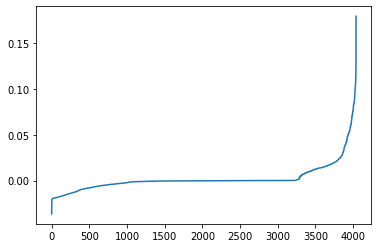

In [48]:
plt.plot(el[1])

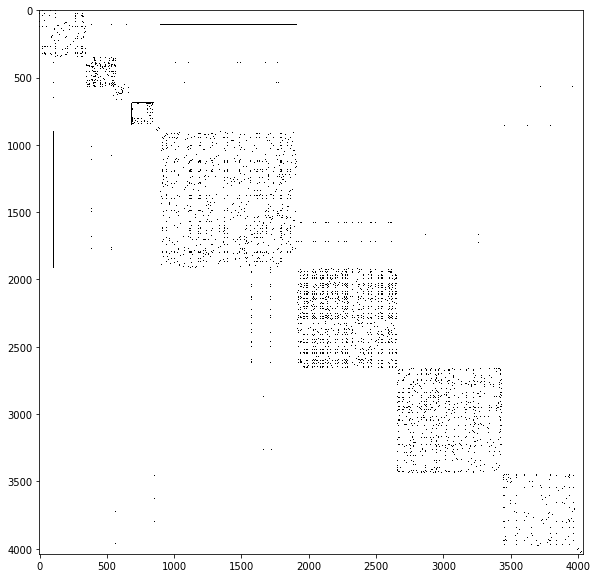

In [113]:
fig = plt.figure(figsize=(10, 10)) # in inches
plt.imshow(adj_mat,
                  cmap="Greys",
                  interpolation="none")

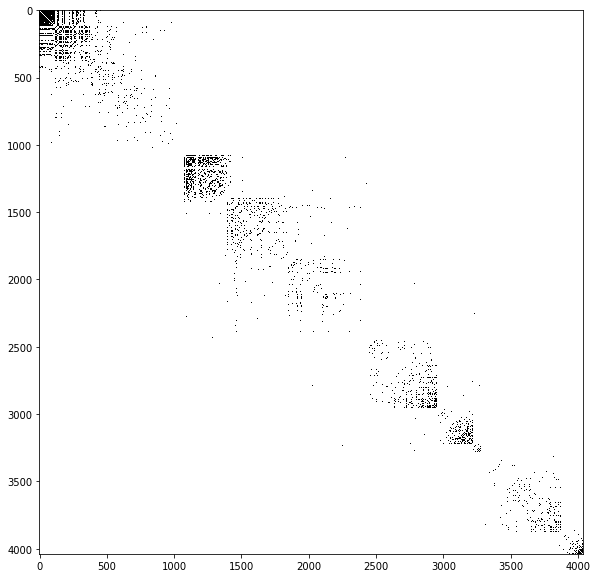

In [50]:
idx = np.ix_(el[0],el[0])
adj_mat[idx]
fig = plt.figure(figsize=(10, 10)) # in inches
plt.imshow(adj_mat[idx],
                  cmap="Greys",
                  interpolation="none")

In [292]:
g = nx.from_numpy_matrix(adj_mat)

In [283]:
fiedler = nx.fiedler_vector(g,normalized=True)

In [17]:
graph = np.zeros((4039,2),dtype=int)
for i,j in enumerate(fiedler):
    if j>0:
        graph[i][0] = i
        graph[i][1] = 1
    else:
        graph[i][0] = i
        graph[i][1] = 0

In [56]:
for i in range(4039):
    if graph[i][1]!=graph_partition[i][1]:
        print("False")
        break
    else:
        print("yes")

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [18]:
labels = [0 if v < 0 else 1 for v in fiedler]

In [294]:
for i in g.nodes():
    g.nodes[i]['weights'] = graph_partition_fb[i][1]

In [295]:
nx.write_gexf(g,"facebook6.gexf")

In [296]:
num_cluster = np.unique(graph_partition_fb.T[1]).shape[0]
lst_cluster = [[] for i in range(num_cluster)]
for i in graph_partition_fb:
    lst_cluster[i[1]].append(i[0])
lst_cluster

[[472,
  567,
  610,
  686,
  687,
  688,
  689,
  690,
  691,
  692,
  693,
  694,
  695,
  696,
  697,
  698,
  699,
  700,
  701,
  702,
  703,
  704,
  705,
  706,
  707,
  708,
  709,
  710,
  711,
  712,
  713,
  714,
  715,
  716,
  717,
  718,
  719,
  720,
  721,
  722,
  723,
  724,
  725,
  726,
  727,
  728,
  729,
  730,
  731,
  732,
  733,
  734,
  735,
  736,
  737,
  738,
  739,
  740,
  741,
  742,
  743,
  744,
  745,
  746,
  747,
  748,
  749,
  750,
  751,
  752,
  753,
  754,
  755,
  756,
  757,
  758,
  759,
  760,
  761,
  762,
  763,
  764,
  765,
  766,
  767,
  768,
  769,
  770,
  771,
  772,
  773,
  774,
  775,
  776,
  777,
  778,
  779,
  780,
  781,
  782,
  783,
  784,
  785,
  786,
  787,
  788,
  789,
  790,
  791,
  792,
  793,
  794,
  795,
  796,
  797,
  798,
  799,
  800,
  801,
  802,
  803,
  804,
  805,
  806,
  807,
  808,
  809,
  810,
  811,
  812,
  813,
  814,
  815,
  816,
  817,
  818,
  819,
  820,
  821,
  822,
  823,
  824,
  825,

In [297]:
def plot(list_clusters, G1):
    def color_list(n):
        colors= []
        for  i in range(n):
            color = "#" + "%06x" % random.randint(0, 0xFFFFFF)
            colors.append(color)
        return colors
    colors = color_list(len(list_clusters))
    fig = plt.figure(figsize=(30,30))
    pos =nx.spring_layout(G1)
    nx.draw_networkx_edges(G1,pos)
    for i in range(len(list_clusters)):
        nx.draw_networkx_nodes(G1,pos,nodelist=list_clusters[i],node_color=colors[i], node_size=100,)

D:\Application\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


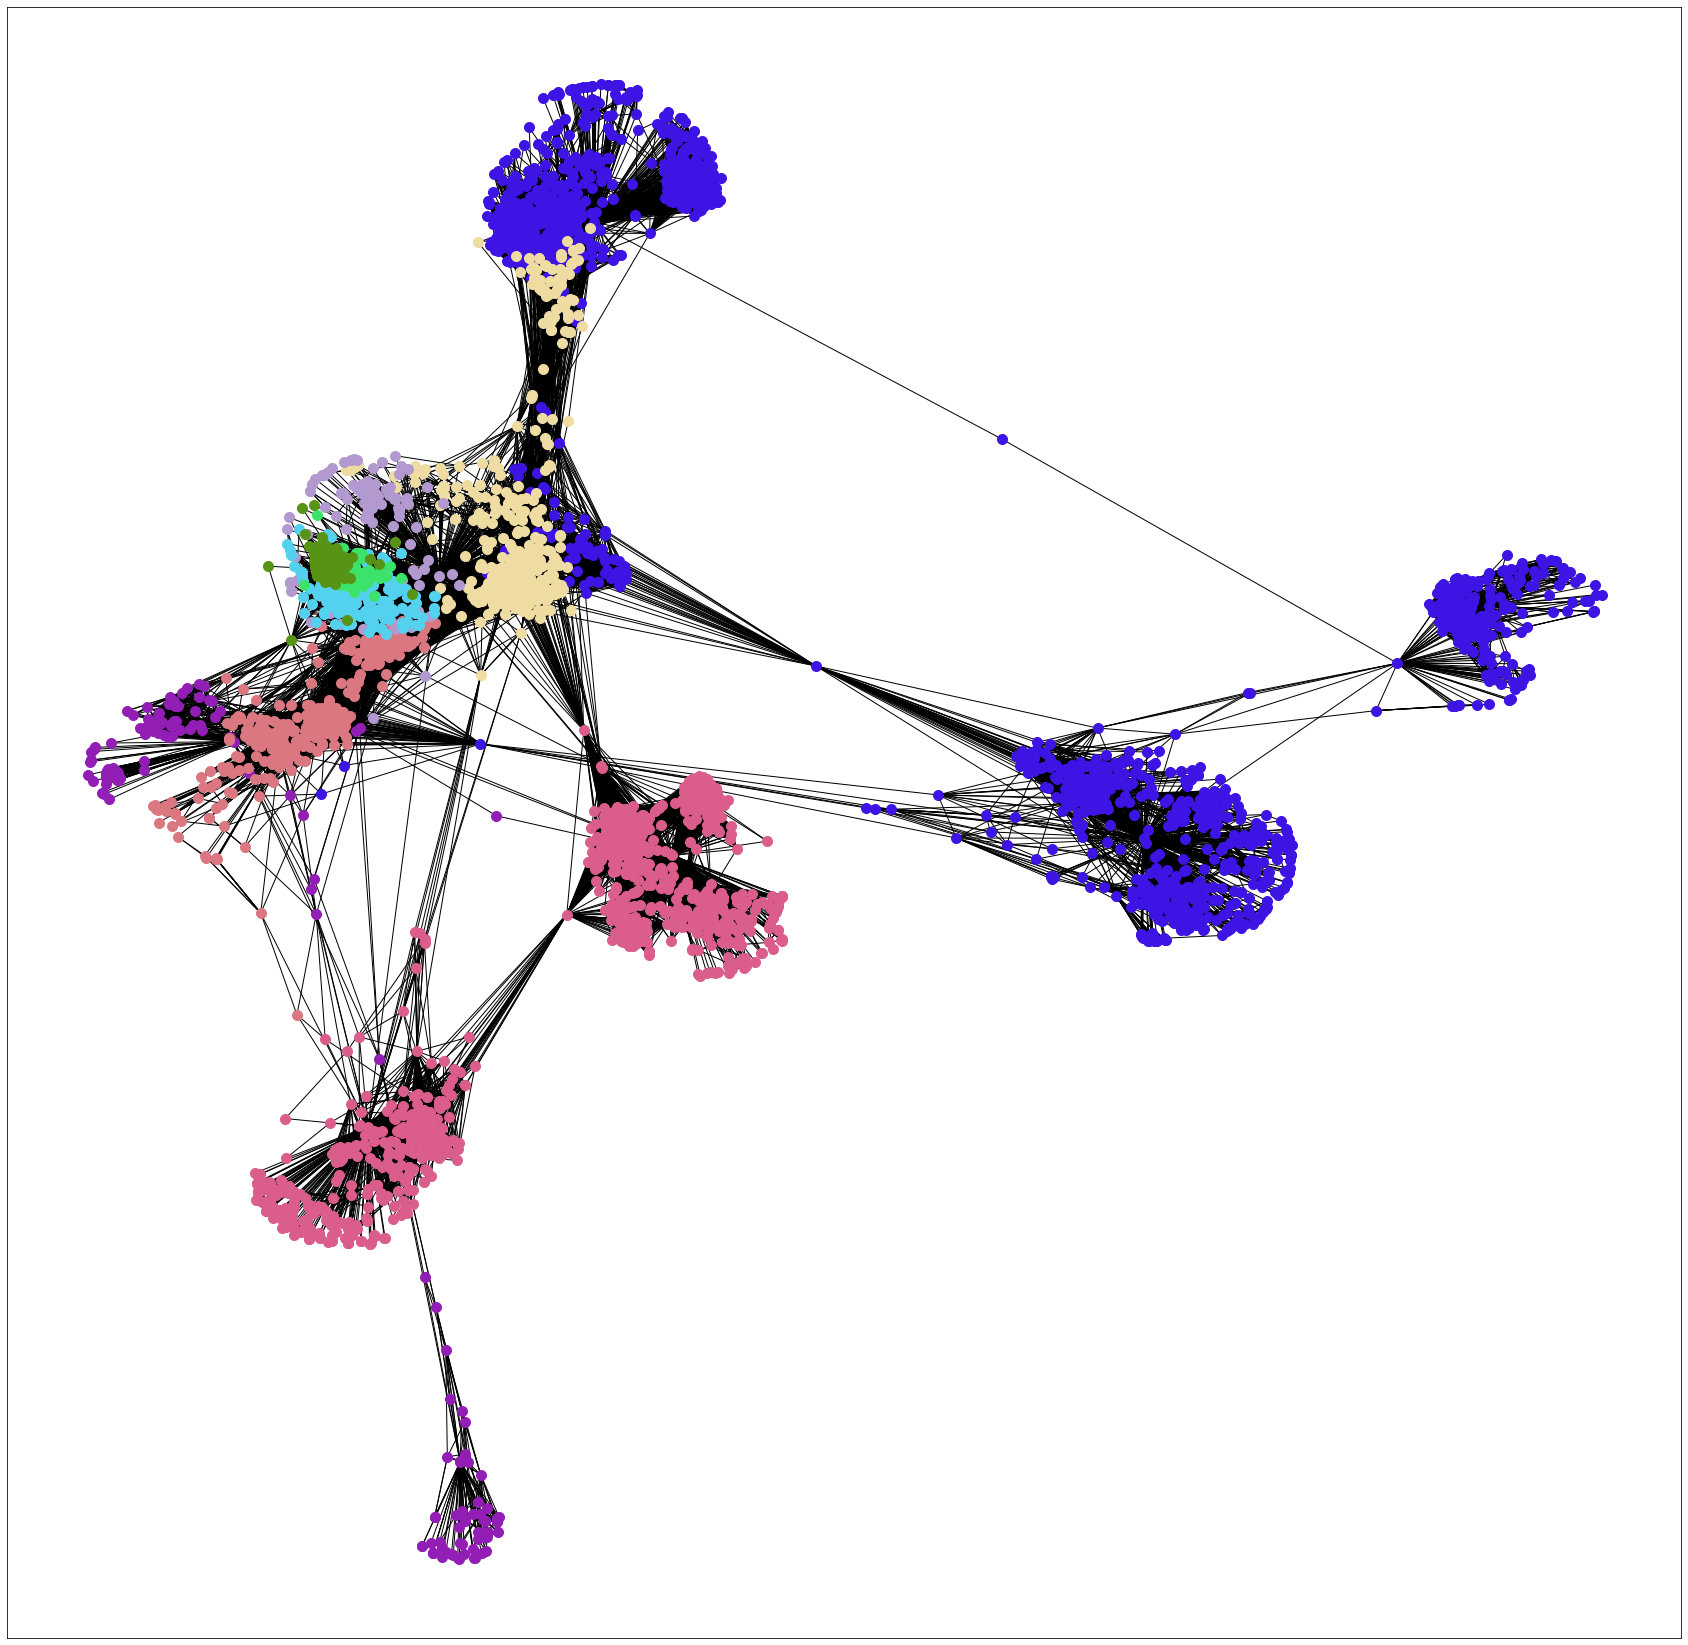

In [298]:
plot(lst_cluster,g)

In [6]:
def spectralDecomposition(data):
    num_vert = data.max()
    adj_mat = np.zeros((num_vert+1,num_vert+1),dtype=int)
    for i in data:
        adj_mat[i[0],i[1]] = 1
        adj_mat[i[1],i[0]] = 1
    
    deg = np.diag(adj_mat.sum(axis=0))
    L = deg-adj_mat
    
    deg_half = 1.0/np.sqrt(adj_mat.sum(axis=0))
    deg_half[np.isinf(deg_half)] = 0
    deg_h = np.diag(deg_half)
    norm_L = deg_h@(L@deg_h)
    
    eig_val,eig_vec = np.linalg.eigh(norm_L)
    d = {}
    for i,j in zip(eig_val,eig_vec.T):
        d[i] = j.T
    d = dict(sorted(d.items()))
    
    eig = np.sort(eig_val)
    k = 0
    m = -1
    for i in range(1,eig.shape[0]):
        if eig[i]-eig[i-1]>m:
            m = eig[i]-eig[i-1]
            k = i
    graph_partition = np.zeros((num_vert+1,2),dtype=int)
    for i in range(num_vert+1):
        graph_partition[i][0] = i
    
    for i in range(7):
        print("Community : "+str(i))
        fiedler_vec,adj_mat,graph_tmp = spectralDecomp_OneIter(data)
        ndata = []
        for j in range(adj_mat.shape[0]):
            if graph_tmp[j][1] == 0:
                continue
            for l in range(adj_mat.shape[0]):
                if adj_mat[j][l]==1 and graph_tmp[l][1] != 0:
                    ndata.append([graph_tmp[j][0],graph_tmp[l][0]])
        data = np.array(ndata)
        print(data.shape)
        for j in graph_tmp:
            if j[1]==0:
                continue
            graph_partition[j[0]][1] = i+1
    return graph_partition

In [319]:
def util(data,graph_partition,tup,dep=0):
    if dep==4:
        return
    fiedler_vec,adj_mat,graph_tmp = spectralDecomp_OneIter(data)
    
    lst = sorted(list(enumerate(fiedler_vec)),key=lambda x: x[1])
    el = list(zip(*lst))
    idx = np.ix_(el[0],el[0])
    mt = adj_mat[idx][idx]
    
    posidx = np.where(np.array(el[1])<0)[0].shape[0]
    
    posdata = []
    negdata = []
    for i in range(mt.shape[0]):
        for j in range(mt.shape[0]):
            if mt[i][j]==1:
                if i<posidx and j<posidx:
                    negdata.append([graph_tmp[i][0],graph_tmp[j][0]])
                    graph_partition[graph_tmp[i][0]][0] = graph_tmp[i][0]
                    graph_partition[graph_tmp[i][0]][1] = dep*2
                else:
                    posdata.append([graph_tmp[i][0],graph_tmp[j][0]])
                    graph_partition[graph_tmp[i][0]][0] = graph_tmp[i][0]
                    graph_partition[graph_tmp[i][0]][1] = 2*dep+1
                
    
    util(np.array(negdata),graph_partition,dep+1)
    util(np.array(posdata),graph_partition,dep+1)

In [317]:
def spectralDecomposition(data):
    num_vert = data.max()
    graph_partition = np.zeros((num_vert+1,2),dtype=int)
    for i in range(num_vert+1):
        graph_partition[i][0] = i
    util(data,graph_partition)
    return graph_partition

In [238]:
def spectralDecomposition(data):
    num_vert = data.max()
    '''adj_mat = np.zeros((num_vert+1,num_vert+1),dtype=int)
    for i in data:
        adj_mat[i[0],i[1]] = 1
        adj_mat[i[1],i[0]] = 1
    
    deg = np.diag(adj_mat.sum(axis=0))
    L = deg-adj_mat
    
    deg_half = 1.0/np.sqrt(adj_mat.sum(axis=0))
    deg_half[np.isinf(deg_half)] = 0
    deg_h = np.diag(deg_half)
    norm_L = deg_h@(L@deg_h)
    
    eig_val,eig_vec = np.linalg.eigh(norm_L)
    d = {}
    for i,j in zip(eig_val,eig_vec.T):
        d[i] = j.T
    d = dict(sorted(d.items()))
    
    eig = np.sort(eig_val)
    k = 0
    m = -1
    for i in range(1,eig.shape[0]):
        if eig[i]-eig[i-1]>m:
            m = eig[i]-eig[i-1]
            k = i'''
    graph_partition = np.zeros((num_vert+1,2),dtype=int)
    lst_cluster = [[]]
    for i in range(num_vert+1):
        graph_partition[i][0] = i
    for i in range(7):
        print("Community : "+str(i))
        fiedler_vec,adj_mat_tmp,graph_tmp = spectralDecomp_OneIter(data)
        lst_cluster.pop(0)
        zlust = np.array(graph_tmp, copy=True)
        oclust = np.array(graph_tmp, copy=True)
        z = set()
        o = set()
        for j in range(graph_tmp.shape[0]):
            if graph_tmp[j][1] == 0:
                oclust[j][1] = -1
                z.add(graph_tmp[j][0])
            else:
                zlust[j][1] = -1
                o.add(graph_tmp[j][0])
        print(len(o),len(z),graph_tmp.shape)
        lst_cluster.append((adj_mat_tmp,zlust,len(z)))
        lst_cluster.append((adj_mat_tmp,oclust,len(o)))
        lst_cluster.sort(key=lambda x: x[2],reverse=True)
        adj_mat_ntmp,ngraph,_ = lst_cluster[0]
        ndata = []
        for j in range(adj_mat_ntmp.shape[0]):
            if ngraph[j][1] == -1:
                continue
            for l in range(adj_mat_ntmp.shape[0]):
                if adj_mat_ntmp[j][l]==1:
                    if ngraph[l][1]>=0:
                        ndata.append([j,l])
        data = np.array(ndata)
    for i in range(len(lst_cluster)):
        _,g_tmp,_ = lst_cluster[i]
        for j in range(graph_partition.shape[0]):
            if g_tmp[i][1] >= 0:
                graph_partition[i][0] = g_tmp[i][0]
                graph_partition[i][1] = i
    return lst_cluster

In [7]:
graph_partition_fb = spectralDecomposition(data)

Community : 0
(131142, 2)
Community : 1
(63740, 2)
Community : 2
(61128, 2)
Community : 3
(26006, 2)
Community : 4
(14860, 2)
Community : 5
(12198, 2)
Community : 6
(8096, 2)


In [240]:
graph_partition_fb

[(array([[0, 1, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]), array([[1648,    0],
         [1561,    0],
         [1424,    0],
         ...,
         [ 484,   -1],
         [ 599,   -1],
         [ 457,   -1]]), 1288), (array([[0, 1, 1, ..., 0, 0, 0],
         [1, 0, 1, ..., 0, 0, 0],
         [1, 1, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]), array([[3101,    0],
         [3291,    0],
         [2742,    0],
         ...,
         [2754,   -1],
         [3363,   -1],
         [2839,   -1]]), 1266), (array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]), array([[ 457,    0],
   

In [199]:
lst_cluster = [(1,2),(2,3),(3,4)]
lst_cluster.pop(0)
lst_cluster

array([14,  1])

In [228]:
graph_partition_fb[0][1].T.shape
#graph_partition_fb[0][1].T[1][graph_partition_fb[0][1].T[1]==-1].shape

(2, 61423)

In [256]:
graph_partition = np.zeros((4039,2),dtype=int)
lll = []
for i in range(len(graph_partition_fb)):
    adj,g_tmp,_ = graph_partition_fb[i]
    for j in g_tmp:
        if j[1] != -1:
            lll.append(j)
            graph_partition[j[0]][0] = j[0]
            graph_partition[j[0]][1] = i

In [258]:
np.unique(lll).shape

(3136,)

In [56]:
lstc = []
lstc.append(graph_partition_fb)
lstc.append(graph_partition)
lstc
lstc.sort(key=lambda x: np.sum(x,axis=0)[1])
print(lstc)

[array([[0, 1],
       [1, 1],
       [2, 1],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]]), array([[   0,    3],
       [   1,    4],
       [   2,    3],
       ...,
       [4036,    1],
       [4037,    1],
       [4038,    1]])]


In [16]:
from sklearn.cluster import SpectralClustering

In [20]:
clustering = SpectralClustering(n_clusters=2,
         eigen_solver='lobpcg',
         random_state=0).fit(adj_mat)

D:\Application\Anaconda\lib\site-packages\sklearn\cluster\spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
D:\Application\Anaconda\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [22]:
y_pred = clustering.labels_

In [24]:
for i in range(y_pred.shape[0]):
    if graph_partition[i][1]==y_pred[i]:
        print(y_pred[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [26]:
np.sum(graph_partition[:,1])

1530

In [31]:
np.where(y_pred==1,y_pred)

ValueError: either both or neither of x and y should be given